# Model And Observed Maps

Here we (1) read `CBIOMES model output` and `ocean color data` from file, and (2) illustrate these arrays as global maps in `julia`.

<img src="../figs/cbiomes-01.png" alt="Drawing" style="height: 100px;"/>

### Read variables from file

Two-dimensional arrays for longitude (`lon`), latitude (`lat`), irradiance reflectance from a model (`drwn3_Rirr` at `wv_drwn3`), and remotely sensed reflectance from satellite data (`cci_Rrs_490` at 490nm) are read from files in the `samples/` folder.

In [1]:
dirIn="../samples/"

fld = Array{Float32,2}(undef,(720,360))
fid = open(dirIn*"lon.bin"); read!(fid,fld); lon = hton.(fld)

fld = Array{Float32,2}(undef,(720,360))
fid = open(dirIn*"lat.bin"); read!(fid,fld); lat = hton.(fld)

fld = Array{Float32,2}(undef,(720,360))
fid = open(dirIn*"cci_Rrs_490.bin"); read!(fid,fld); cci_Rrs_490 = hton.(fld)
cci_Rrs_490[findall(cci_Rrs_490.==0)].=NaN

fld = Array{Float32,3}(undef,(720,360,13))
fid = open(dirIn*"drwn3_Rirr.bin"); read!(fid,fld); drwn3_Rirr = hton.(fld)
drwn3_Rirr[findall(drwn3_Rirr.==0)].=NaN;

### Model and data wavebands

Currently, the `OC-CCI` [satellite data set](https://esa-oceancolour-cci.org) provides remotely sensed reflectance at 6 wavelengths (`wv_cci` in `nm`) while the `CBIOMES-global` [ocean model](https://cbiomes.readthedocs.io/) outputs irradiance reflectance at 13 wavelengths (`wv_drwn3` in `nm`). 

In [2]:
wv_cci=[412, 443, 490, 510, 555, 670]
wv_drwn3=[400,425,450,475,500,525,550,575,600,625,650,675,700];

### Display model and data maps

The `Plots.jl` package provides convenient plotting recipes like `heatmap`. the following command assumes that `Plots.jl` has aleary been installed using `julia`'s package manager (documentation available [here](https://docs.julialang.org/en/)). 

In [3]:
using Plots

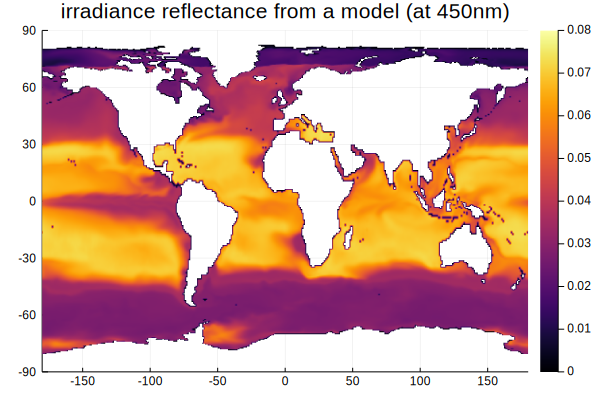

In [4]:
ii=3
heatmap(vec(lon[:,1]),vec(lat[1,:]), transpose(drwn3_Rirr[:,:,ii]), clims=(0,0.08))
title!("irradiance reflectance from a model (at $(wv_drwn3[ii])nm)")

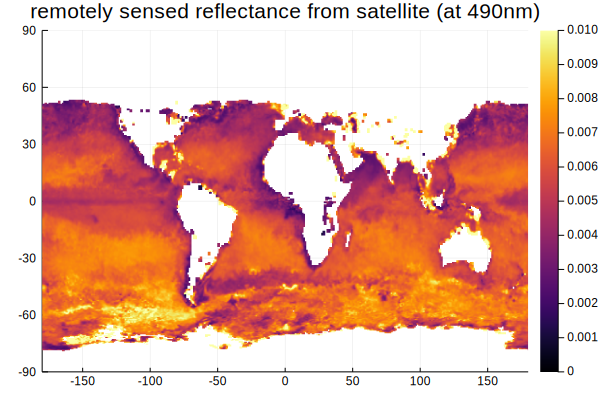

In [5]:
heatmap(vec(lon[:,1]),vec(lat[1,:]), transpose(cci_Rrs_490), clims=(0,0.01))
title!("remotely sensed reflectance from satellite (at 490nm)")

### Your turn!

Here is one idea in case you want to take this a bit further:

- Turn recipes from `OceanColourAlgorithms.ipynb` into functions.
- Apply these to all points in `drwn3_Rirr` using for loops or broadcast.
- Plot the resulting map of `Rrs` to compare with the data map (`cci_Rrs_490`).